In [205]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from IPython.display import display
%matplotlib inline

`Propertycrime = α + Population + Population2 + Murder + Robbery`

The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.


In [213]:
# load data
df = pd.read_csv('./data/new-york.csv', thousands=",") # use "thousands" to handle the thousand comma separator
display(df.columns)

data = pd.DataFrame()
data["population"] = df["Population"]
data["population2"] = data["population"]**2
data["murder"] = (df["Murder and\rnonnegligent\rmanslaughter"] > 0).astype(int)
data["robery"] = (df["Robbery"] > 0).astype(int)
data["property_crime"] = df["Property\rcrime"]
data = data.dropna()
display(data.head())
data.shape

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Aggravated\rassault', 'Property\rcrime', 'Burglary',
       'Larceny-\rtheft', 'Motor\rvehicle\rtheft', 'Arson3'],
      dtype='object')

,population,population2,murder,robery,property_crime
0,1861.0,3.463321e+06,0,0,12.0
1,2577.0,6.640929e+06,0,0,24.0
2,2846.0,8.099716e+06,0,0,16.0
3,97956.0,9.595378e+09,1,1,4090.0
4,6388.0,4.080654e+07,0,1,223.0


(348, 5)

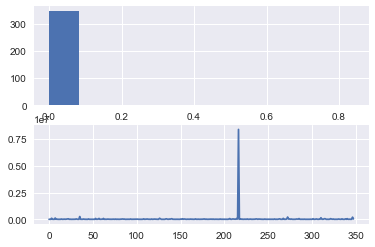

In [207]:
plt.subplot(211)
plt.hist(data["population"])

plt.subplot(212)
plt.plot(data["population"])

(348,)

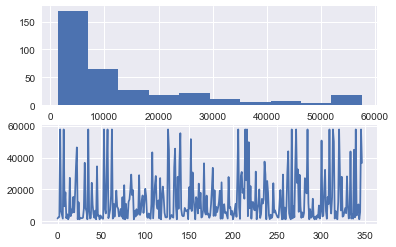

In [208]:
data_no_outliers = mstats.winsorize(data["population"], limits=0.05)

display(data_no_outliers.shape)

plt.subplot(211)
plt.hist(data_no_outliers)

plt.subplot(212)
plt.plot(data_no_outliers)

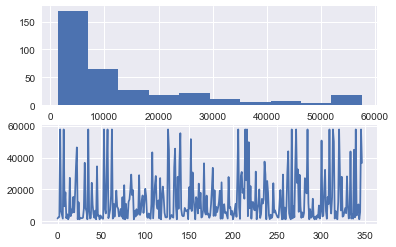

In [209]:
# The above looks clean, let's use that instead
data["population"] = mstats.winsorize(data["population"], limits=0.05)
data["population2"] = data["population"]**2

plt.subplot(211)
plt.hist(data["population"])

plt.subplot(212)
plt.plot(data["population"])

In [214]:
# data["crime"] = data["population"] + data["population2"] + data["murder"] + data["robbery"]
# Question: How do we know that this is the formula to use? ^^^

In [216]:
# Beginning of analysis

regr = linear_model.LinearRegression()
Y = data["property_crime"]
X = data[["population", "population2", "murder", "robery"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  3.46570268e-02  -2.11108019e-09   1.51866535e+01  -9.62774363e+01]

Intercept: 
 -109.575335623

R-squared:
0.996124710499


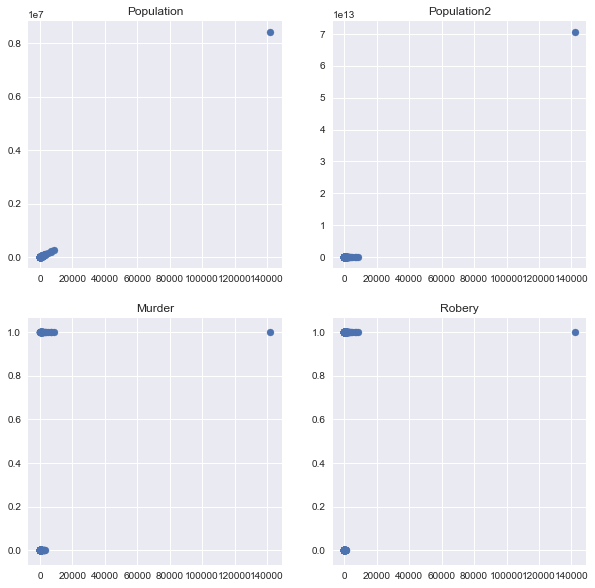

In [243]:
predicted = regr.predict(X).ravel()
actual = data['property_crime']
residual = actual - predicted

# Question: What data should we use to build the scatter plot to measure linear relationship?
# Carl answer: all of them?

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title("Population")
plt.scatter(predicted, data['population'])

plt.subplot(222)
plt.title("Population2")
plt.scatter(predicted, data['population2'])

plt.subplot(223)
plt.title("Murder")
plt.scatter(predicted, data['murder'])

plt.subplot(224)
plt.title("Robery")
plt.scatter(predicted, data['robery'])

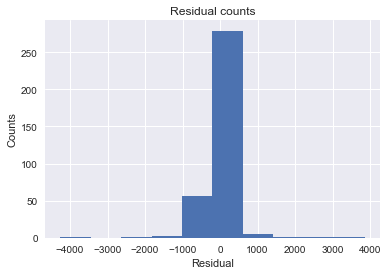

In [221]:
plt.hist(residual)
plt.title("Residual counts")
plt.xlabel("Residual")
plt.ylabel("Counts")

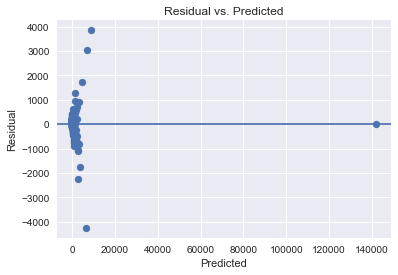

In [229]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')

In [230]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population,population2,murder,robery
population,1.000000,0.998264,0.162309,0.064371
population2,0.998264,1.000000,0.133067,0.043983
murder,0.162309,0.133067,1.000000,0.313271
robery,0.064371,0.043983,0.313271,1.000000
